In [1]:
# KNN Classification

In [21]:
import matplotlib.pyplot as plt

In [22]:
from sklearn.datasets import make_classification

In [23]:
from matplotlib.colors import ListedColormap

In [24]:
cmap_bold = ListedColormap(['#FFFF00','#00FF00','#0000FF','#000000'])

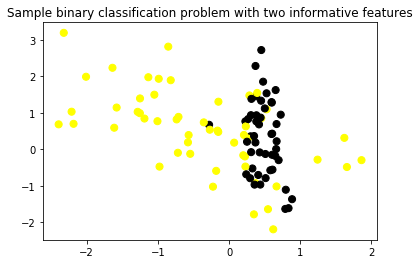

In [25]:
X_C2, y_C2 = make_classification(n_samples = 100, n_features = 2,
                                n_redundant = 0, n_informative = 2,
                                n_clusters_per_class=1, flip_y=0.1,
                                class_sep=0.5,random_state=0)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
plt.scatter(X_C2[:,0],X_C2[:,1],c=y_C2,marker='o',s=50,cmap = cmap_bold)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_C2,y_C2,random_state=0)

In [28]:
import numpy
from sklearn import neighbors
import matplotlib.patches as mpatches

In [29]:
def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()


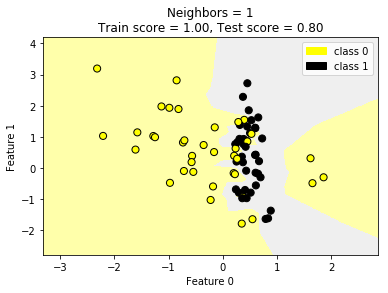

In [30]:
plot_two_class_knn(X_train,y_train,1,'uniform',X_test,y_test)

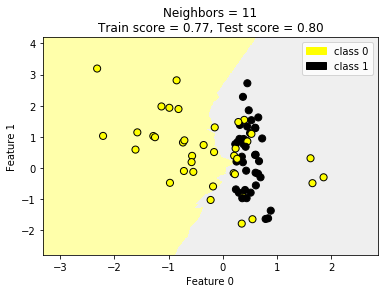

In [31]:
plot_two_class_knn(X_train, y_train,11, 'uniform',X_test,y_test)

In [34]:
# simple code without any visualization

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

X_C2, y_C2 = make_classification(n_samples=100, n_features=2,
                                 n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, flip_y=0.1,
                                 class_sep=0.5,random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                    random_state=0)
clf = KNeighborsClassifier(n_neighbors=11, weights='uniform' )
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train_score ={:.2f}, test_score={:.2f}'
      .format(train_score,test_score))

train_score =0.77, test_score=0.80


In [33]:
! python KNN\ Classifier.py

/home/skvis/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, defaultdict
train_score =0.77, test_score=0.77


In [20]:
! gedit KNN\ Classifier.py